In [147]:
import os, csv
import pandas as pd

In [148]:
base_dir = "data/old/"
data = pd.read_csv(os.path.join(base_dir, "01_EVENT.csv"))

/opt/envs/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [149]:
data.columns

Index(['ID', 'EVENTNUM', 'EXTERNALNUMBER', 'NAMEEVENTTYPE', 'CALLTIME',
       'STARTTIME', 'FINISHTIME', 'STATUS'],
      dtype='object')

In [150]:
# 02_EVENT_RESOURCE: Contains alarm times and resources (helicopters)

# id, resource, 
# name: helicopter callsign  HB-ZRQ
# type: helicopter model Heli_Rega_EC145
# time_alarm: iso alarm time

event_res = pd.read_csv(os.path.join(base_dir, "02_EVENT_RESOURCE.csv"))
event_res.columns

Index(['ID', 'IDRESOURCE', 'NAME_AT_ALARMTIME', 'RESOURCETYPE_AT_ALARMTIME',
       'TIME_ALARM'],
      dtype='object')

In [253]:
# 03_PROTOCOL: free-text comments about missions
# id, protocol,
# type: always "event_statuschange"
# creation_date: iso datetime
# **CHANGES:** state_from | state_to
# remark: free text
# created_by: username, ~|100|
# pos: int, always 0
# idmain: always ""
# host: hostname of someone

## Status transitions from the beginning until the end of a mission 
##  seem to look as follows in the old system:
## Aufnahme | Vergabe | Reserviert | Alarmiert | Beendet
##  There might be a gap between Alarmiert and Beendet howeber

protocol = pd.read_csv(os.path.join(base_dir, "03_PROTOCOL.csv"))
protocol[protocol['ID'] == 3014317246]
#protocol['ID'][15:]


#protocol['CHANGES'].value_counts()

ID  IDPROTOCOL                TYPE        CREATION_DATE  \
8   3014317246  3014317257  event_statuschange  2012-02-02 11:09:38   
9   3014317246  3014317270  event_statuschange  2012-02-02 11:12:20   
10  3014317246  3014317274  event_statuschange  2012-02-02 11:12:25   
11  3014317246  3014317570  event_statuschange  2012-02-02 14:18:48   
12  3014317246  3014427406  event_statuschange  2012-03-30 10:09:16   
13  3014317246  3014427455  event_statuschange  2012-03-30 10:10:34   
14  3014317246  3014427486  event_statuschange  2012-03-30 10:11:36   
15  3014317246  3014427494  event_statuschange  2012-03-30 10:11:42   
16  3014317246  3014427785  event_statuschange  2012-03-30 10:21:52   

                   CHANGES                              REMARK CREATED_BY  \
8       Aufnahme | Vergabe  Statuswechsel von Einsatz 12002511    Hofmann   
9     Vergabe | Reserviert  Statuswechsel von Einsatz 12002511    Hofmann   
10  Reserviert | Alarmiert  Statuswechsel von Einsatz 12002511    Hofmann   
11     Alarmiert | Vergabe  Statuswechsel von Einsatz 12002511    Hofmann   
12    Vergabe | Reserviert  Statuswechsel von Einsatz 12002511     mfrega   
13    Reserviert | Vergabe  Statuswechsel von Einsatz 12002511     mfrega   
14    Vergabe | Reserviert  Statuswechsel von Einsatz 12002511     mfrega   
15  Reserviert | Alarmiert  Statuswechsel von Einsatz 12002511     mfrega   
16     Alarmiert | Beendet  Statuswechsel von Einsatz 12002511     mfrega   

    POS  IDMAIN                  HOST  
8     0     NaN  sv-rc-083.rega.local  
9     0     NaN  sv-rc-083.rega.local  
10    0     NaN  sv-rc-083.rega.local  
11    0     NaN  sv-rc-083.rega.local  
12    0     NaN  ws-rc-503.rega.local  
13    0     NaN  ws-rc-503.rega.local  
14    0     NaN  ws-rc-503.rega.local  
15    0     NaN  ws-rc-503.rega.local  
16    0     NaN  ws-rc-503.rega.local

In [268]:
states = protocol.copy()

states['CREATION_DATE'] = pd.to_datetime(states['CREATION_DATE'])
states['from'] = states['CHANGES'].apply(lambda x: x.split("|")[0].strip())
states['to']   = states['CHANGES'].apply(lambda x: x.split("|")[1].strip())
states[['from','to']]

states['CHANGES'] = states['from'] + ' | ' + states['to']
x = states['CHANGES'].value_counts()
x = x[x > 10000]
states[states['CHANGES'].isin(x.index)]
states
print(x)

Aufnahme | Vergabe           125687
Vergabe | Reserviert         120725
Alarmiert | Beendet           94985
Reserviert | Alarmiert        93246
Aufnahme | Storniert          45624
Vergabe | Beendet             43314
Reserviert | Vergabe          26030
Vorgeplant | Vergabe          18737
Dauerauftrag | Vorgeplant     11912
Aufnahme | Beendet            11550
Name: CHANGES, dtype: int64


In [271]:
states = states.sort_values("CREATION_DATE")
states.head()

ID  IDPROTOCOL                TYPE       CREATION_DATE  \
1  3014311180  3014311189  event_statuschange 2012-01-03 16:16:36   
3  3014311242  3014311254  event_statuschange 2012-01-03 16:24:54   
4  3014311242  3014311267  event_statuschange 2012-01-03 16:31:03   
2  3014311180  3014311269  event_statuschange 2012-01-03 16:31:31   
8  3014317246  3014317257  event_statuschange 2012-02-02 11:09:38   

               CHANGES                              REMARK CREATED_BY  POS  \
1   Aufnahme | Vergabe  Statuswechsel von Einsatz 12002509     mfrega    0   
3   Aufnahme | Vergabe  Statuswechsel von Einsatz 12002510     mfrega    0   
4  Vergabe | Storniert  Statuswechsel von Einsatz 12002510     mfrega    0   
2  Vergabe | Storniert  Statuswechsel von Einsatz 12002509     mfrega    0   
8   Aufnahme | Vergabe  Statuswechsel von Einsatz 12002511    Hofmann    0   

   IDMAIN                  HOST      from         to  
1     NaN  ws-rc-502.rega.local  Aufnahme    Vergabe  
3     NaN  ws-rc-502.rega.local  Aufnahme    Vergabe  
4     NaN  ws-rc-502.rega.local   Vergabe  Storniert  
2     NaN  ws-rc-502.rega.local   Vergabe  Storniert  
8     NaN  sv-rc-083.rega.local  Aufnahme    Vergabe

In [281]:
states[states['ID'] == 3023250481]

ID  IDPROTOCOL                TYPE       CREATION_DATE  \
18819  3023250481  3023250492  event_statuschange 2013-02-14 21:51:48   
18820  3023250481  3023250496  event_statuschange 2013-02-14 21:51:55   
18821  3023250481  3023250500  event_statuschange 2013-02-14 21:52:00   
18822  3023250481  3023252494  event_statuschange 2013-02-14 23:44:03   
18823  3023250481  3023252502  event_statuschange 2013-02-14 23:44:49   

                       CHANGES                              REMARK CREATED_BY  \
18819       Aufnahme | Vergabe  Statuswechsel von Einsatz 13003403     gbrega   
18820     Vergabe | Reserviert  Statuswechsel von Einsatz 13003403     gbrega   
18821   Reserviert | Alarmiert  Statuswechsel von Einsatz 13003403     gbrega   
18822      Alarmiert | Beendet  Statuswechsel von Einsatz 13003403     hwrega   
18823  Beendet | Abgeschlossen  Statuswechsel von Einsatz 13003403     hwrega   

       POS  IDMAIN                  HOST        from             to  
18819    0     NaN  ws-rc-509.rega.local    Aufnahme        Vergabe  
18820    0     NaN  ws-rc-509.rega.local     Vergabe     Reserviert  
18821    0     NaN  ws-rc-509.rega.local  Reserviert      Alarmiert  
18822    0     NaN  ws-rc-507.rega.local   Alarmiert        Beendet  
18823    0     NaN  ws-rc-507.rega.local     Beendet  Abgeschlossen

In [283]:
from tqdm.auto import tqdm

good_flow = ["Aufnahme", "Vergabe", "Reserviert", "Alarmiert", "Beendet"]
good_ids = []

for id_ in tqdm(states['ID'].unique()):
    #print(states[states['ID'] == id_].shape)
    s = states[states['ID'] == id_]
    if list(s["from"].values[:4]) == good_flow[:4]:
        good_ids.append(id_)
#         if len(good_ids) % 10 == 0:
#             print(len(good_ids))
states.head()





  0%|          | 0/204342 [00:00<?, ?it/s]



  0%|          | 60/204342 [00:00<05:43, 595.07it/s]



  0%|          | 126/204342 [00:00<05:33, 612.49it/s]



  0%|          | 188/204342 [00:00<05:32, 613.09it/s]



  0%|          | 258/204342 [00:00<05:20, 636.38it/s]



  0%|          | 322/204342 [00:00<05:21, 635.07it/s]



  0%|          | 384/204342 [00:00<05:24, 628.04it/s]



  0%|          | 453/204342 [00:00<05:16, 644.64it/s]



  0%|          | 516/204342 [00:00<05:18, 639.32it/s]



  0%|          | 577/204342 [00:00<05:59, 566.66it/s]



  0%|          | 633/204342 [00:01<06:01, 564.21it/s]



  0%|          | 689/204342 [00:01<06:33, 517.73it/s]



  0%|          | 742/204342 [00:01<06:56, 488.41it/s]



  0%|          | 792/204342 [00:01<07:12, 470.47it/s]



  0%|          | 840/204342 [00:01<07:29, 453.19it/s]



  0%|          | 886/204342 [00:01<07:40, 442.21it/s]



  0%|          | 931/204342 [00:01<07:42, 439.37it/s]



  0%|          | 988/204342 [00:01<07:1

  4%|▎         | 7229/204342 [00:12<05:39, 580.40it/s]



  4%|▎         | 7288/204342 [00:12<05:54, 556.13it/s]



  4%|▎         | 7345/204342 [00:12<06:12, 529.23it/s]



  4%|▎         | 7401/204342 [00:12<06:07, 536.24it/s]



  4%|▎         | 7466/204342 [00:12<05:48, 565.22it/s]



  4%|▎         | 7536/204342 [00:12<05:29, 598.17it/s]



  4%|▎         | 7607/204342 [00:13<05:13, 626.78it/s]



  4%|▍         | 7671/204342 [00:13<05:31, 592.92it/s]



  4%|▍         | 7732/204342 [00:13<05:37, 582.91it/s]



  4%|▍         | 7792/204342 [00:13<05:49, 562.96it/s]



  4%|▍         | 7850/204342 [00:13<06:18, 519.74it/s]



  4%|▍         | 7904/204342 [00:13<06:36, 494.90it/s]



  4%|▍         | 7955/204342 [00:13<06:44, 485.48it/s]



  4%|▍         | 8005/204342 [00:13<06:48, 480.99it/s]



  4%|▍         | 8054/204342 [00:13<06:54, 473.54it/s]



  4%|▍         | 8112/204342 [00:14<06:32, 500.08it/s]



  4%|▍         | 8178/204342 [00:14<06:04, 538.65it/s]



  4%|▍        

  7%|▋         | 14573/204342 [00:24<05:16, 599.13it/s]



  7%|▋         | 14634/204342 [00:24<05:18, 595.17it/s]



  7%|▋         | 14695/204342 [00:25<05:24, 583.56it/s]



  7%|▋         | 14762/204342 [00:25<05:12, 606.37it/s]



  7%|▋         | 14830/204342 [00:25<05:03, 624.46it/s]



  7%|▋         | 14894/204342 [00:25<05:13, 603.58it/s]



  7%|▋         | 14955/204342 [00:25<05:13, 604.99it/s]



  7%|▋         | 15020/204342 [00:25<05:06, 617.56it/s]



  7%|▋         | 15087/204342 [00:25<04:59, 631.57it/s]



  7%|▋         | 15156/204342 [00:25<04:52, 647.30it/s]



  7%|▋         | 15222/204342 [00:25<05:04, 620.90it/s]



  7%|▋         | 15285/204342 [00:26<05:03, 623.20it/s]



  8%|▊         | 15357/204342 [00:26<04:51, 647.91it/s]



  8%|▊         | 15423/204342 [00:26<04:50, 650.32it/s]



  8%|▊         | 15489/204342 [00:26<05:03, 622.26it/s]



  8%|▊         | 15552/204342 [00:26<05:08, 611.49it/s]



  8%|▊         | 15614/204342 [00:26<05:19, 590.92it/s]


 11%|█         | 22095/204342 [00:37<04:32, 668.85it/s]



 11%|█         | 22165/204342 [00:37<04:28, 677.89it/s]



 11%|█         | 22233/204342 [00:37<04:31, 669.57it/s]



 11%|█         | 22302/204342 [00:37<04:29, 674.88it/s]



 11%|█         | 22371/204342 [00:37<04:28, 677.00it/s]



 11%|█         | 22441/204342 [00:37<04:26, 682.25it/s]



 11%|█         | 22510/204342 [00:37<04:32, 667.58it/s]



 11%|█         | 22578/204342 [00:37<04:31, 669.32it/s]



 11%|█         | 22650/204342 [00:37<04:25, 683.23it/s]



 11%|█         | 22719/204342 [00:37<04:26, 681.43it/s]



 11%|█         | 22788/204342 [00:38<04:28, 676.86it/s]



 11%|█         | 22856/204342 [00:38<04:28, 676.19it/s]



 11%|█         | 22924/204342 [00:38<04:29, 673.73it/s]



 11%|█▏        | 22992/204342 [00:38<04:28, 674.77it/s]



 11%|█▏        | 23060/204342 [00:38<04:28, 675.92it/s]



 11%|█▏        | 23132/204342 [00:38<04:23, 686.52it/s]



 11%|█▏        | 23201/204342 [00:38<04:25, 682.42it/s]


 15%|█▍        | 30119/204342 [00:48<04:12, 690.80it/s]



 15%|█▍        | 30189/204342 [00:48<04:11, 691.64it/s]



 15%|█▍        | 30262/204342 [00:48<04:08, 701.04it/s]



 15%|█▍        | 30333/204342 [00:49<04:09, 696.44it/s]



 15%|█▍        | 30403/204342 [00:49<04:12, 690.16it/s]



 15%|█▍        | 30473/204342 [00:49<04:14, 684.08it/s]



 15%|█▍        | 30542/204342 [00:49<04:15, 681.26it/s]



 15%|█▍        | 30611/204342 [00:49<04:15, 678.80it/s]



 15%|█▌        | 30679/204342 [00:49<04:16, 676.65it/s]



 15%|█▌        | 30750/204342 [00:49<04:13, 684.54it/s]



 15%|█▌        | 30819/204342 [00:49<04:13, 683.43it/s]



 15%|█▌        | 30888/204342 [00:49<04:13, 683.25it/s]



 15%|█▌        | 30957/204342 [00:49<04:14, 680.61it/s]



 15%|█▌        | 31026/204342 [00:50<04:14, 680.09it/s]



 15%|█▌        | 31098/204342 [00:50<04:10, 690.61it/s]



 15%|█▌        | 31168/204342 [00:50<04:12, 684.94it/s]



 15%|█▌        | 31240/204342 [00:50<04:09, 693.79it/s]


 19%|█▊        | 38118/204342 [01:00<04:01, 687.50it/s]



 19%|█▊        | 38188/204342 [01:00<04:01, 689.31it/s]



 19%|█▊        | 38257/204342 [01:00<04:02, 684.49it/s]



 19%|█▉        | 38326/204342 [01:00<04:02, 683.59it/s]



 19%|█▉        | 38395/204342 [01:00<04:02, 683.12it/s]



 19%|█▉        | 38464/204342 [01:00<04:02, 685.13it/s]



 19%|█▉        | 38533/204342 [01:01<04:02, 684.25it/s]



 19%|█▉        | 38603/204342 [01:01<04:01, 686.78it/s]



 19%|█▉        | 38673/204342 [01:01<04:00, 689.16it/s]



 19%|█▉        | 38743/204342 [01:01<03:59, 690.01it/s]



 19%|█▉        | 38813/204342 [01:01<04:01, 684.94it/s]



 19%|█▉        | 38882/204342 [01:01<04:02, 681.18it/s]



 19%|█▉        | 38951/204342 [01:01<04:03, 677.96it/s]



 19%|█▉        | 39019/204342 [01:01<04:05, 673.24it/s]



 19%|█▉        | 39089/204342 [01:01<04:03, 679.35it/s]



 19%|█▉        | 39161/204342 [01:01<03:59, 688.54it/s]



 19%|█▉        | 39231/204342 [01:02<03:59, 689.00it/s]


 23%|██▎       | 46104/204342 [01:12<03:50, 685.09it/s]



 23%|██▎       | 46173/204342 [01:12<03:51, 684.29it/s]



 23%|██▎       | 46244/204342 [01:12<03:49, 689.35it/s]



 23%|██▎       | 46313/204342 [01:12<03:50, 686.44it/s]



 23%|██▎       | 46385/204342 [01:12<03:47, 695.46it/s]



 23%|██▎       | 46455/204342 [01:12<03:49, 689.12it/s]



 23%|██▎       | 46525/204342 [01:12<03:48, 691.35it/s]



 23%|██▎       | 46595/204342 [01:12<03:47, 693.17it/s]



 23%|██▎       | 46666/204342 [01:12<03:46, 696.95it/s]



 23%|██▎       | 46736/204342 [01:13<03:47, 691.34it/s]



 23%|██▎       | 46806/204342 [01:13<03:51, 679.99it/s]



 23%|██▎       | 46875/204342 [01:13<03:52, 677.62it/s]



 23%|██▎       | 46946/204342 [01:13<03:49, 684.59it/s]



 23%|██▎       | 47018/204342 [01:13<03:46, 693.94it/s]



 23%|██▎       | 47090/204342 [01:13<03:44, 700.54it/s]



 23%|██▎       | 47161/204342 [01:13<03:45, 698.57it/s]



 23%|██▎       | 47231/204342 [01:13<03:47, 691.11it/s]


 26%|██▋       | 54092/204342 [01:23<03:41, 678.10it/s]



 27%|██▋       | 54161/204342 [01:23<03:40, 680.77it/s]



 27%|██▋       | 54230/204342 [01:24<03:40, 680.79it/s]



 27%|██▋       | 54299/204342 [01:24<03:39, 683.17it/s]



 27%|██▋       | 54369/204342 [01:24<03:38, 687.15it/s]



 27%|██▋       | 54439/204342 [01:24<03:36, 690.93it/s]



 27%|██▋       | 54509/204342 [01:24<03:36, 690.93it/s]



 27%|██▋       | 54581/204342 [01:24<03:34, 698.56it/s]



 27%|██▋       | 54651/204342 [01:24<03:34, 698.28it/s]



 27%|██▋       | 54721/204342 [01:24<03:36, 692.18it/s]



 27%|██▋       | 54793/204342 [01:24<03:33, 699.02it/s]



 27%|██▋       | 54863/204342 [01:25<03:36, 691.45it/s]



 27%|██▋       | 54933/204342 [01:25<03:37, 687.27it/s]



 27%|██▋       | 55002/204342 [01:25<03:38, 682.18it/s]



 27%|██▋       | 55071/204342 [01:25<03:38, 682.26it/s]



 27%|██▋       | 55143/204342 [01:25<03:35, 692.26it/s]



 27%|██▋       | 55213/204342 [01:25<03:35, 693.16it/s]


 30%|███       | 62072/204342 [01:35<03:29, 677.55it/s]



 30%|███       | 62140/204342 [01:35<03:30, 676.44it/s]



 30%|███       | 62208/204342 [01:35<03:30, 675.39it/s]



 30%|███       | 62276/204342 [01:35<03:30, 675.65it/s]



 31%|███       | 62349/204342 [01:36<03:26, 688.96it/s]



 31%|███       | 62418/204342 [01:36<03:27, 684.58it/s]



 31%|███       | 62487/204342 [01:36<03:27, 682.40it/s]



 31%|███       | 62556/204342 [01:36<03:28, 681.16it/s]



 31%|███       | 62626/204342 [01:36<03:26, 686.00it/s]



 31%|███       | 62695/204342 [01:36<03:26, 684.69it/s]



 31%|███       | 62764/204342 [01:36<03:27, 683.25it/s]



 31%|███       | 62835/204342 [01:36<03:24, 690.50it/s]



 31%|███       | 62905/204342 [01:36<03:25, 687.72it/s]



 31%|███       | 62974/204342 [01:36<03:26, 684.92it/s]



 31%|███       | 63043/204342 [01:37<03:26, 683.49it/s]



 31%|███       | 63112/204342 [01:37<03:27, 680.03it/s]



 31%|███       | 63184/204342 [01:37<03:24, 690.42it/s]


 34%|███▍      | 70114/204342 [01:47<03:14, 691.85it/s]



 34%|███▍      | 70184/204342 [01:47<03:13, 692.84it/s]



 34%|███▍      | 70257/204342 [01:47<03:10, 702.03it/s]



 34%|███▍      | 70328/204342 [01:47<03:12, 695.28it/s]



 34%|███▍      | 70399/204342 [01:47<03:11, 697.92it/s]



 34%|███▍      | 70472/204342 [01:47<03:09, 705.25it/s]



 35%|███▍      | 70543/204342 [01:47<03:11, 698.55it/s]



 35%|███▍      | 70615/204342 [01:48<03:09, 704.21it/s]



 35%|███▍      | 70686/204342 [01:48<03:12, 693.60it/s]



 35%|███▍      | 70756/204342 [01:48<03:13, 689.35it/s]



 35%|███▍      | 70825/204342 [01:48<03:15, 684.02it/s]



 35%|███▍      | 70895/204342 [01:48<03:14, 687.60it/s]



 35%|███▍      | 70965/204342 [01:48<03:13, 690.26it/s]



 35%|███▍      | 71035/204342 [01:48<03:12, 690.81it/s]



 35%|███▍      | 71106/204342 [01:48<03:11, 696.33it/s]



 35%|███▍      | 71176/204342 [01:48<03:14, 684.58it/s]



 35%|███▍      | 71245/204342 [01:48<03:14, 682.62it/s]


 38%|███▊      | 78149/204342 [01:59<03:05, 680.03it/s]



 38%|███▊      | 78218/204342 [01:59<03:06, 676.89it/s]



 38%|███▊      | 78290/204342 [01:59<03:03, 688.61it/s]



 38%|███▊      | 78359/204342 [01:59<03:04, 684.03it/s]



 38%|███▊      | 78428/204342 [01:59<03:04, 682.61it/s]



 38%|███▊      | 78499/204342 [01:59<03:02, 690.24it/s]



 38%|███▊      | 78569/204342 [01:59<03:03, 686.28it/s]



 38%|███▊      | 78638/204342 [01:59<03:03, 684.81it/s]



 39%|███▊      | 78707/204342 [01:59<03:03, 683.61it/s]



 39%|███▊      | 78776/204342 [01:59<03:04, 679.40it/s]



 39%|███▊      | 78844/204342 [02:00<03:05, 677.52it/s]



 39%|███▊      | 78912/204342 [02:00<03:06, 671.75it/s]



 39%|███▊      | 78984/204342 [02:00<03:03, 684.48it/s]



 39%|███▊      | 79055/204342 [02:00<03:01, 690.59it/s]



 39%|███▊      | 79125/204342 [02:00<03:02, 686.71it/s]



 39%|███▉      | 79194/204342 [02:00<03:03, 682.15it/s]



 39%|███▉      | 79264/204342 [02:00<03:02, 685.65it/s]


 42%|████▏     | 86109/204342 [02:10<02:54, 676.62it/s]



 42%|████▏     | 86181/204342 [02:10<02:52, 686.79it/s]



 42%|████▏     | 86252/204342 [02:10<02:50, 693.01it/s]



 42%|████▏     | 86324/204342 [02:11<02:48, 699.29it/s]



 42%|████▏     | 86394/204342 [02:11<02:51, 689.70it/s]



 42%|████▏     | 86464/204342 [02:11<02:51, 685.68it/s]



 42%|████▏     | 86533/204342 [02:11<02:52, 681.78it/s]



 42%|████▏     | 86605/204342 [02:11<02:50, 690.92it/s]



 42%|████▏     | 86677/204342 [02:11<02:48, 696.90it/s]



 42%|████▏     | 86747/204342 [02:11<02:51, 687.20it/s]



 42%|████▏     | 86816/204342 [02:11<02:52, 683.03it/s]



 43%|████▎     | 86885/204342 [02:11<02:52, 682.04it/s]



 43%|████▎     | 86957/204342 [02:12<02:49, 690.74it/s]



 43%|████▎     | 87029/204342 [02:12<02:48, 696.94it/s]



 43%|████▎     | 87099/204342 [02:12<02:50, 688.64it/s]



 43%|████▎     | 87171/204342 [02:12<02:48, 696.48it/s]



 43%|████▎     | 87241/204342 [02:12<02:50, 688.25it/s]


 46%|████▌     | 94104/204342 [02:22<02:42, 678.23it/s]



 46%|████▌     | 94175/204342 [02:22<02:40, 687.21it/s]



 46%|████▌     | 94244/204342 [02:22<02:40, 683.94it/s]



 46%|████▌     | 94313/204342 [02:22<02:41, 682.79it/s]



 46%|████▌     | 94386/204342 [02:22<02:38, 693.75it/s]



 46%|████▌     | 94456/204342 [02:23<02:39, 686.91it/s]



 46%|████▋     | 94525/204342 [02:23<02:40, 683.01it/s]



 46%|████▋     | 94595/204342 [02:23<02:40, 685.66it/s]



 46%|████▋     | 94664/204342 [02:23<02:40, 682.00it/s]



 46%|████▋     | 94736/204342 [02:23<02:38, 691.91it/s]



 46%|████▋     | 94806/204342 [02:23<02:38, 693.03it/s]



 46%|████▋     | 94876/204342 [02:23<02:39, 686.47it/s]



 46%|████▋     | 94948/204342 [02:23<02:37, 694.19it/s]



 46%|████▋     | 95018/204342 [02:23<02:39, 684.34it/s]



 47%|████▋     | 95087/204342 [02:23<02:40, 680.70it/s]



 47%|████▋     | 95157/204342 [02:24<02:39, 684.68it/s]



 47%|████▋     | 95226/204342 [02:24<02:41, 674.41it/s]


 50%|████▉     | 102087/204342 [02:34<02:28, 688.28it/s]



 50%|████▉     | 102156/204342 [02:34<02:29, 682.73it/s]



 50%|█████     | 102225/204342 [02:34<02:30, 679.91it/s]



 50%|█████     | 102294/204342 [02:34<02:30, 678.94it/s]



 50%|█████     | 102362/204342 [02:34<02:33, 666.25it/s]



 50%|█████     | 102434/204342 [02:34<02:29, 680.27it/s]



 50%|█████     | 102504/204342 [02:34<02:28, 685.37it/s]



 50%|█████     | 102573/204342 [02:34<02:28, 683.88it/s]



 50%|█████     | 102642/204342 [02:35<02:29, 680.33it/s]



 50%|█████     | 102711/204342 [02:35<02:29, 677.66it/s]



 50%|█████     | 102783/204342 [02:35<02:27, 689.75it/s]



 50%|█████     | 102853/204342 [02:35<02:27, 686.66it/s]



 50%|█████     | 102922/204342 [02:35<02:28, 684.51it/s]



 50%|█████     | 102991/204342 [02:35<02:28, 683.99it/s]



 50%|█████     | 103060/204342 [02:35<02:28, 681.20it/s]



 50%|█████     | 103130/204342 [02:35<02:27, 686.18it/s]



 51%|█████     | 103200/204342 [02:35<02

 54%|█████▍    | 109925/204342 [02:45<02:20, 669.75it/s]



 54%|█████▍    | 109993/204342 [02:45<02:20, 671.40it/s]



 54%|█████▍    | 110063/204342 [02:45<02:19, 677.48it/s]



 54%|█████▍    | 110131/204342 [02:46<02:19, 676.88it/s]



 54%|█████▍    | 110199/204342 [02:46<02:19, 675.99it/s]



 54%|█████▍    | 110267/204342 [02:46<02:19, 676.20it/s]



 54%|█████▍    | 110336/204342 [02:46<02:18, 677.76it/s]



 54%|█████▍    | 110406/204342 [02:46<02:17, 684.08it/s]



 54%|█████▍    | 110475/204342 [02:46<02:17, 682.92it/s]



 54%|█████▍    | 110544/204342 [02:46<02:17, 683.89it/s]



 54%|█████▍    | 110613/204342 [02:46<02:17, 681.72it/s]



 54%|█████▍    | 110682/204342 [02:46<02:17, 681.79it/s]



 54%|█████▍    | 110751/204342 [02:46<02:17, 678.79it/s]



 54%|█████▍    | 110819/204342 [02:47<02:18, 676.96it/s]



 54%|█████▍    | 110887/204342 [02:47<02:18, 676.86it/s]



 54%|█████▍    | 110955/204342 [02:47<02:18, 674.85it/s]



 54%|█████▍    | 111023/204342 [02:47<02

 58%|█████▊    | 117743/204342 [02:57<02:09, 667.83it/s]



 58%|█████▊    | 117810/204342 [02:57<02:10, 662.89it/s]



 58%|█████▊    | 117877/204342 [02:57<02:10, 663.44it/s]



 58%|█████▊    | 117947/204342 [02:57<02:08, 671.55it/s]



 58%|█████▊    | 118017/204342 [02:57<02:07, 677.42it/s]



 58%|█████▊    | 118087/204342 [02:57<02:06, 682.22it/s]



 58%|█████▊    | 118156/204342 [02:57<02:06, 679.84it/s]



 58%|█████▊    | 118225/204342 [02:57<02:07, 676.88it/s]



 58%|█████▊    | 118293/204342 [02:58<02:07, 674.54it/s]



 58%|█████▊    | 118361/204342 [02:58<02:08, 667.17it/s]



 58%|█████▊    | 118428/204342 [02:58<02:09, 665.65it/s]



 58%|█████▊    | 118496/204342 [02:58<02:08, 667.69it/s]



 58%|█████▊    | 118568/204342 [02:58<02:05, 681.69it/s]



 58%|█████▊    | 118639/204342 [02:58<02:04, 689.38it/s]



 58%|█████▊    | 118709/204342 [02:58<02:04, 690.46it/s]



 58%|█████▊    | 118781/204342 [02:58<02:02, 697.30it/s]



 58%|█████▊    | 118851/204342 [02:58<02

 61%|██████▏   | 125598/204342 [03:08<01:56, 673.49it/s]



 61%|██████▏   | 125666/204342 [03:08<01:56, 672.49it/s]



 62%|██████▏   | 125734/204342 [03:08<01:56, 672.21it/s]



 62%|██████▏   | 125802/204342 [03:09<01:56, 672.43it/s]



 62%|██████▏   | 125870/204342 [03:09<01:57, 670.33it/s]



 62%|██████▏   | 125942/204342 [03:09<01:54, 684.38it/s]



 62%|██████▏   | 126011/204342 [03:09<01:54, 683.02it/s]



 62%|██████▏   | 126080/204342 [03:09<01:54, 683.16it/s]



 62%|██████▏   | 126151/204342 [03:09<01:53, 689.91it/s]



 62%|██████▏   | 126221/204342 [03:09<01:53, 689.89it/s]



 62%|██████▏   | 126291/204342 [03:09<01:53, 685.53it/s]



 62%|██████▏   | 126360/204342 [03:09<01:54, 682.17it/s]



 62%|██████▏   | 126429/204342 [03:10<01:55, 672.73it/s]



 62%|██████▏   | 126497/204342 [03:10<01:55, 673.00it/s]



 62%|██████▏   | 126566/204342 [03:10<01:55, 675.56it/s]



 62%|██████▏   | 126638/204342 [03:10<01:53, 685.81it/s]



 62%|██████▏   | 126707/204342 [03:10<01

 65%|██████▌   | 133451/204342 [03:20<01:44, 680.90it/s]



 65%|██████▌   | 133520/204342 [03:20<01:44, 677.03it/s]



 65%|██████▌   | 133592/204342 [03:20<01:43, 686.83it/s]



 65%|██████▌   | 133661/204342 [03:20<01:43, 682.56it/s]



 65%|██████▌   | 133730/204342 [03:20<01:46, 664.47it/s]



 65%|██████▌   | 133797/204342 [03:20<01:46, 662.72it/s]



 66%|██████▌   | 133865/204342 [03:20<01:45, 665.64it/s]



 66%|██████▌   | 133932/204342 [03:21<01:45, 664.95it/s]



 66%|██████▌   | 134004/204342 [03:21<01:43, 679.64it/s]



 66%|██████▌   | 134073/204342 [03:21<01:44, 675.44it/s]



 66%|██████▌   | 134141/204342 [03:21<01:43, 675.53it/s]



 66%|██████▌   | 134209/204342 [03:21<01:44, 673.94it/s]



 66%|██████▌   | 134277/204342 [03:21<01:44, 673.46it/s]



 66%|██████▌   | 134349/204342 [03:21<01:42, 685.54it/s]



 66%|██████▌   | 134418/204342 [03:21<01:42, 681.40it/s]



 66%|██████▌   | 134488/204342 [03:21<01:42, 684.37it/s]



 66%|██████▌   | 134558/204342 [03:21<01

 69%|██████▉   | 141237/204342 [03:31<01:32, 680.48it/s]



 69%|██████▉   | 141308/204342 [03:31<01:31, 688.12it/s]



 69%|██████▉   | 141377/204342 [03:32<01:32, 681.88it/s]



 69%|██████▉   | 141446/204342 [03:32<01:32, 681.19it/s]



 69%|██████▉   | 141515/204342 [03:32<01:32, 677.12it/s]



 69%|██████▉   | 141583/204342 [03:32<01:33, 674.15it/s]



 69%|██████▉   | 141651/204342 [03:32<01:32, 674.35it/s]



 69%|██████▉   | 141722/204342 [03:32<01:31, 684.62it/s]



 69%|██████▉   | 141791/204342 [03:32<01:31, 680.90it/s]



 69%|██████▉   | 141860/204342 [03:32<01:32, 678.20it/s]



 69%|██████▉   | 141928/204342 [03:32<01:32, 677.60it/s]



 69%|██████▉   | 141996/204342 [03:32<01:31, 677.84it/s]



 70%|██████▉   | 142064/204342 [03:33<01:32, 675.64it/s]



 70%|██████▉   | 142134/204342 [03:33<01:31, 681.53it/s]



 70%|██████▉   | 142204/204342 [03:33<01:30, 685.60it/s]



 70%|██████▉   | 142273/204342 [03:33<01:30, 686.85it/s]



 70%|██████▉   | 142342/204342 [03:33<01

 73%|███████▎  | 149085/204342 [03:43<01:19, 691.52it/s]



 73%|███████▎  | 149155/204342 [03:43<01:20, 685.87it/s]



 73%|███████▎  | 149227/204342 [03:43<01:19, 694.29it/s]



 73%|███████▎  | 149297/204342 [03:43<01:19, 690.63it/s]



 73%|███████▎  | 149367/204342 [03:43<01:19, 692.65it/s]



 73%|███████▎  | 149437/204342 [03:43<01:19, 694.49it/s]



 73%|███████▎  | 149509/204342 [03:43<01:18, 700.83it/s]



 73%|███████▎  | 149580/204342 [03:44<01:18, 700.54it/s]



 73%|███████▎  | 149651/204342 [03:44<01:18, 693.02it/s]



 73%|███████▎  | 149721/204342 [03:44<01:19, 685.15it/s]



 73%|███████▎  | 149790/204342 [03:44<01:20, 681.83it/s]



 73%|███████▎  | 149859/204342 [03:44<01:20, 674.36it/s]



 73%|███████▎  | 149927/204342 [03:44<01:20, 672.06it/s]



 73%|███████▎  | 149995/204342 [03:44<01:21, 670.63it/s]



 73%|███████▎  | 150063/204342 [03:44<01:20, 670.80it/s]



 73%|███████▎  | 150131/204342 [03:44<01:20, 671.43it/s]



 74%|███████▎  | 150199/204342 [03:44<01

 77%|███████▋  | 156925/204342 [03:54<01:10, 677.25it/s]



 77%|███████▋  | 156993/204342 [03:54<01:10, 675.16it/s]



 77%|███████▋  | 157061/204342 [03:55<01:10, 673.57it/s]



 77%|███████▋  | 157129/204342 [03:55<01:10, 669.93it/s]



 77%|███████▋  | 157197/204342 [03:55<01:10, 669.45it/s]



 77%|███████▋  | 157269/204342 [03:55<01:08, 683.15it/s]



 77%|███████▋  | 157338/204342 [03:55<01:10, 667.28it/s]



 77%|███████▋  | 157410/204342 [03:55<01:08, 681.88it/s]



 77%|███████▋  | 157479/204342 [03:55<01:08, 680.10it/s]



 77%|███████▋  | 157551/204342 [03:55<01:07, 691.10it/s]



 77%|███████▋  | 157621/204342 [03:55<01:08, 685.75it/s]



 77%|███████▋  | 157690/204342 [03:55<01:08, 680.63it/s]



 77%|███████▋  | 157759/204342 [03:56<01:08, 676.90it/s]



 77%|███████▋  | 157827/204342 [03:56<01:08, 674.32it/s]



 77%|███████▋  | 157895/204342 [03:56<01:09, 672.63it/s]



 77%|███████▋  | 157963/204342 [03:56<01:08, 672.20it/s]



 77%|███████▋  | 158031/204342 [03:56<01

 81%|████████  | 164759/204342 [04:06<01:00, 656.74it/s]



 81%|████████  | 164825/204342 [04:06<01:01, 644.05it/s]



 81%|████████  | 164890/204342 [04:06<01:06, 589.35it/s]



 81%|████████  | 164950/204342 [04:06<01:13, 539.39it/s]



 81%|████████  | 165006/204342 [04:06<01:16, 513.43it/s]



 81%|████████  | 165070/204342 [04:07<01:12, 544.29it/s]



 81%|████████  | 165137/204342 [04:07<01:08, 575.45it/s]



 81%|████████  | 165201/204342 [04:07<01:06, 591.61it/s]



 81%|████████  | 165264/204342 [04:07<01:05, 600.68it/s]



 81%|████████  | 165335/204342 [04:07<01:02, 628.47it/s]



 81%|████████  | 165399/204342 [04:07<01:01, 631.77it/s]



 81%|████████  | 165464/204342 [04:07<01:01, 636.79it/s]



 81%|████████  | 165529/204342 [04:07<01:01, 634.64it/s]



 81%|████████  | 165593/204342 [04:07<01:02, 620.19it/s]



 81%|████████  | 165660/204342 [04:07<01:01, 633.83it/s]



 81%|████████  | 165728/204342 [04:08<00:59, 646.78it/s]



 81%|████████  | 165793/204342 [04:08<00

 84%|████████▍ | 172303/204342 [04:18<00:53, 603.82it/s]



 84%|████████▍ | 172367/204342 [04:18<00:52, 614.18it/s]



 84%|████████▍ | 172434/204342 [04:18<00:50, 627.91it/s]



 84%|████████▍ | 172497/204342 [04:18<00:50, 626.62it/s]



 84%|████████▍ | 172563/204342 [04:18<00:49, 636.10it/s]



 84%|████████▍ | 172627/204342 [04:18<00:49, 636.87it/s]



 85%|████████▍ | 172692/204342 [04:18<00:49, 639.54it/s]



 85%|████████▍ | 172757/204342 [04:18<00:52, 606.79it/s]



 85%|████████▍ | 172819/204342 [04:19<00:54, 578.75it/s]



 85%|████████▍ | 172881/204342 [04:19<00:53, 589.07it/s]



 85%|████████▍ | 172948/204342 [04:19<00:51, 610.17it/s]



 85%|████████▍ | 173014/204342 [04:19<00:50, 623.44it/s]



 85%|████████▍ | 173085/204342 [04:19<00:48, 645.96it/s]



 85%|████████▍ | 173152/204342 [04:19<00:47, 652.04it/s]



 85%|████████▍ | 173220/204342 [04:19<00:47, 657.78it/s]



 85%|████████▍ | 173290/204342 [04:19<00:46, 669.89it/s]



 85%|████████▍ | 173358/204342 [04:19<00

 88%|████████▊ | 180021/204342 [04:29<00:35, 681.08it/s]



 88%|████████▊ | 180090/204342 [04:29<00:35, 676.93it/s]



 88%|████████▊ | 180158/204342 [04:30<00:35, 672.58it/s]



 88%|████████▊ | 180226/204342 [04:30<00:35, 670.22it/s]



 88%|████████▊ | 180294/204342 [04:30<00:36, 667.50it/s]



 88%|████████▊ | 180362/204342 [04:30<00:35, 669.35it/s]



 88%|████████▊ | 180429/204342 [04:30<00:35, 669.20it/s]



 88%|████████▊ | 180497/204342 [04:30<00:35, 670.40it/s]



 88%|████████▊ | 180569/204342 [04:30<00:34, 683.54it/s]



 88%|████████▊ | 180638/204342 [04:30<00:34, 681.62it/s]



 88%|████████▊ | 180707/204342 [04:30<00:34, 679.54it/s]



 88%|████████▊ | 180775/204342 [04:30<00:34, 679.06it/s]



 89%|████████▊ | 180845/204342 [04:31<00:34, 683.54it/s]



 89%|████████▊ | 180917/204342 [04:31<00:33, 693.92it/s]



 89%|████████▊ | 180987/204342 [04:31<00:33, 687.57it/s]



 89%|████████▊ | 181056/204342 [04:31<00:34, 681.55it/s]



 89%|████████▊ | 181125/204342 [04:31<00

 92%|█████████▏| 187562/204342 [04:41<00:26, 630.64it/s]



 92%|█████████▏| 187629/204342 [04:41<00:26, 641.61it/s]



 92%|█████████▏| 187695/204342 [04:41<00:25, 646.96it/s]



 92%|█████████▏| 187765/204342 [04:41<00:25, 660.75it/s]



 92%|█████████▏| 187835/204342 [04:41<00:24, 670.66it/s]



 92%|█████████▏| 187903/204342 [04:42<00:24, 671.80it/s]



 92%|█████████▏| 187971/204342 [04:42<00:24, 672.26it/s]



 92%|█████████▏| 188039/204342 [04:42<00:24, 670.44it/s]



 92%|█████████▏| 188107/204342 [04:42<00:24, 669.59it/s]



 92%|█████████▏| 188175/204342 [04:42<00:24, 656.74it/s]



 92%|█████████▏| 188245/204342 [04:42<00:24, 666.76it/s]



 92%|█████████▏| 188315/204342 [04:42<00:23, 675.07it/s]



 92%|█████████▏| 188383/204342 [04:42<00:23, 674.28it/s]



 92%|█████████▏| 188451/204342 [04:42<00:23, 663.19it/s]



 92%|█████████▏| 188518/204342 [04:42<00:23, 665.16it/s]



 92%|█████████▏| 188586/204342 [04:43<00:23, 667.45it/s]



 92%|█████████▏| 188658/204342 [04:43<00

 95%|█████████▌| 194965/204342 [04:53<00:14, 630.38it/s]



 95%|█████████▌| 195029/204342 [04:53<00:15, 610.93it/s]



 95%|█████████▌| 195102/204342 [04:53<00:14, 640.98it/s]



 96%|█████████▌| 195167/204342 [04:53<00:14, 630.26it/s]



 96%|█████████▌| 195232/204342 [04:53<00:14, 633.28it/s]



 96%|█████████▌| 195301/204342 [04:53<00:13, 647.18it/s]



 96%|█████████▌| 195367/204342 [04:53<00:14, 626.58it/s]



 96%|█████████▌| 195431/204342 [04:54<00:16, 543.48it/s]



 96%|█████████▌| 195488/204342 [04:54<00:17, 512.16it/s]



 96%|█████████▌| 195548/204342 [04:54<00:16, 534.52it/s]



 96%|█████████▌| 195613/204342 [04:54<00:15, 563.45it/s]



 96%|█████████▌| 195675/204342 [04:54<00:14, 578.38it/s]



 96%|█████████▌| 195739/204342 [04:54<00:14, 593.54it/s]



 96%|█████████▌| 195803/204342 [04:54<00:14, 606.06it/s]



 96%|█████████▌| 195869/204342 [04:54<00:13, 618.89it/s]



 96%|█████████▌| 195932/204342 [04:54<00:13, 610.12it/s]



 96%|█████████▌| 195994/204342 [04:55<00

 99%|█████████▊| 201706/204342 [05:05<00:04, 601.02it/s]



 99%|█████████▊| 201767/204342 [05:05<00:04, 592.11it/s]



 99%|█████████▉| 201832/204342 [05:05<00:04, 606.11it/s]



 99%|█████████▉| 201896/204342 [05:05<00:03, 615.60it/s]



 99%|█████████▉| 201958/204342 [05:05<00:04, 558.86it/s]



 99%|█████████▉| 202017/204342 [05:05<00:04, 566.12it/s]



 99%|█████████▉| 202075/204342 [05:06<00:03, 569.66it/s]



 99%|█████████▉| 202133/204342 [05:06<00:03, 562.60it/s]



 99%|█████████▉| 202190/204342 [05:06<00:03, 545.61it/s]



 99%|█████████▉| 202245/204342 [05:06<00:03, 534.14it/s]



 99%|█████████▉| 202306/204342 [05:06<00:03, 554.80it/s]



 99%|█████████▉| 202367/204342 [05:06<00:03, 570.10it/s]



 99%|█████████▉| 202425/204342 [05:06<00:04, 474.82it/s]



 99%|█████████▉| 202488/204342 [05:06<00:03, 512.10it/s]



 99%|█████████▉| 202550/204342 [05:06<00:03, 538.21it/s]



 99%|█████████▉| 202607/204342 [05:07<00:03, 500.46it/s]



 99%|█████████▉| 202663/204342 [05:07<00

ID  IDPROTOCOL                TYPE       CREATION_DATE  \
1  3014311180  3014311189  event_statuschange 2012-01-03 16:16:36   
3  3014311242  3014311254  event_statuschange 2012-01-03 16:24:54   
4  3014311242  3014311267  event_statuschange 2012-01-03 16:31:03   
2  3014311180  3014311269  event_statuschange 2012-01-03 16:31:31   
8  3014317246  3014317257  event_statuschange 2012-02-02 11:09:38   

               CHANGES                              REMARK CREATED_BY  POS  \
1   Aufnahme | Vergabe  Statuswechsel von Einsatz 12002509     mfrega    0   
3   Aufnahme | Vergabe  Statuswechsel von Einsatz 12002510     mfrega    0   
4  Vergabe | Storniert  Statuswechsel von Einsatz 12002510     mfrega    0   
2  Vergabe | Storniert  Statuswechsel von Einsatz 12002509     mfrega    0   
8   Aufnahme | Vergabe  Statuswechsel von Einsatz 12002511    Hofmann    0   

   IDMAIN                  HOST      from         to  
1     NaN  ws-rc-502.rega.local  Aufnahme    Vergabe  
3     NaN  ws-rc-502.rega.local  Aufnahme    Vergabe  
4     NaN  ws-rc-502.rega.local   Vergabe  Storniert  
2     NaN  ws-rc-502.rega.local   Vergabe  Storniert  
8     NaN  sv-rc-083.rega.local  Aufnahme    Vergabe

In [290]:
len(good_ids)
with open("good-ids.txt", "wb") as wp:
    import pickle
    pickle.dump(good_ids, wp)

In [293]:
state_times = {}
good_states = states[states['ID'].isin(good_ids)]

for id_ in tqdm(good_ids):
    state_times[id_] = {}
    for i, s in good_states[good_states['ID'] == id_].iterrows():
        state_times[id_][s['to']] = s['CREATION_DATE']





  0%|          | 0/71812 [00:00<?, ?it/s]



  0%|          | 50/71812 [00:00<02:24, 496.03it/s]



  0%|          | 102/71812 [00:00<02:22, 501.49it/s]



  0%|          | 155/71812 [00:00<02:20, 508.93it/s]



  0%|          | 209/71812 [00:00<02:19, 514.91it/s]



  0%|          | 263/71812 [00:00<02:17, 519.98it/s]



  0%|          | 317/71812 [00:00<02:16, 525.08it/s]



  1%|          | 381/71812 [00:00<02:09, 553.14it/s]



  1%|          | 434/71812 [00:00<02:11, 544.85it/s]



  1%|          | 486/71812 [00:01<02:50, 417.99it/s]



  1%|          | 531/71812 [00:01<03:42, 320.09it/s]



  1%|          | 577/71812 [00:01<03:22, 350.99it/s]



  1%|          | 626/71812 [00:01<03:06, 382.58it/s]



  1%|          | 691/71812 [00:01<02:43, 435.42it/s]



  1%|          | 750/71812 [00:01<02:30, 471.26it/s]



  1%|          | 802/71812 [00:01<02:29, 474.67it/s]



  1%|          | 856/71812 [00:01<02:24, 491.94it/s]



  1%|▏         | 908/71812 [00:01<02:21, 499.86it/s]





  8%|▊         | 5498/71812 [00:13<02:24, 459.58it/s]



  8%|▊         | 5547/71812 [00:13<02:22, 466.46it/s]



  8%|▊         | 5598/71812 [00:13<02:18, 478.32it/s]



  8%|▊         | 5651/71812 [00:13<02:14, 491.96it/s]



  8%|▊         | 5703/71812 [00:13<02:12, 498.38it/s]



  8%|▊         | 5754/71812 [00:14<02:17, 479.14it/s]



  8%|▊         | 5806/71812 [00:14<02:14, 489.89it/s]



  8%|▊         | 5856/71812 [00:14<02:15, 485.04it/s]



  8%|▊         | 5905/71812 [00:14<02:16, 482.62it/s]



  8%|▊         | 5954/71812 [00:14<02:16, 481.51it/s]



  8%|▊         | 6003/71812 [00:14<02:18, 474.61it/s]



  8%|▊         | 6051/71812 [00:14<02:21, 465.13it/s]



  8%|▊         | 6098/71812 [00:14<02:22, 461.37it/s]



  9%|▊         | 6145/71812 [00:14<02:24, 453.53it/s]



  9%|▊         | 6191/71812 [00:15<02:43, 402.27it/s]



  9%|▊         | 6237/71812 [00:15<02:37, 416.01it/s]



  9%|▉         | 6286/71812 [00:15<02:30, 435.67it/s]



  9%|▉         | 6333/71812 [00

 16%|█▌        | 11416/71812 [00:25<02:03, 487.89it/s]



 16%|█▌        | 11468/71812 [00:25<02:01, 495.54it/s]



 16%|█▌        | 11518/71812 [00:25<02:02, 490.87it/s]



 16%|█▌        | 11569/71812 [00:26<02:01, 495.02it/s]



 16%|█▌        | 11619/71812 [00:26<02:02, 491.80it/s]



 16%|█▌        | 11669/71812 [00:26<02:03, 488.33it/s]



 16%|█▋        | 11719/71812 [00:26<02:02, 489.39it/s]



 16%|█▋        | 11768/71812 [00:26<02:04, 482.85it/s]



 16%|█▋        | 11821/71812 [00:26<02:00, 495.95it/s]



 17%|█▋        | 11873/71812 [00:26<01:59, 501.54it/s]



 17%|█▋        | 11925/71812 [00:26<01:58, 504.64it/s]



 17%|█▋        | 11976/71812 [00:26<02:00, 498.03it/s]



 17%|█▋        | 12026/71812 [00:26<02:01, 490.27it/s]



 17%|█▋        | 12076/71812 [00:27<02:02, 486.88it/s]



 17%|█▋        | 12129/71812 [00:27<01:59, 498.54it/s]



 17%|█▋        | 12179/71812 [00:27<02:01, 492.53it/s]



 17%|█▋        | 12229/71812 [00:27<02:01, 490.77it/s]



 17%|█▋       

 24%|██▍       | 17280/71812 [00:37<01:51, 487.22it/s]



 24%|██▍       | 17331/71812 [00:37<01:50, 493.56it/s]



 24%|██▍       | 17381/71812 [00:37<01:51, 489.48it/s]



 24%|██▍       | 17431/71812 [00:38<01:50, 492.46it/s]



 24%|██▍       | 17482/71812 [00:38<01:49, 496.56it/s]



 24%|██▍       | 17532/71812 [00:38<01:49, 496.29it/s]



 24%|██▍       | 17583/71812 [00:38<01:48, 498.57it/s]



 25%|██▍       | 17633/71812 [00:38<01:50, 490.75it/s]



 25%|██▍       | 17683/71812 [00:38<01:50, 488.01it/s]



 25%|██▍       | 17732/71812 [00:38<01:51, 485.23it/s]



 25%|██▍       | 17781/71812 [00:38<01:51, 485.41it/s]



 25%|██▍       | 17830/71812 [00:38<01:51, 484.37it/s]



 25%|██▍       | 17882/71812 [00:38<01:49, 492.73it/s]



 25%|██▍       | 17932/71812 [00:39<01:49, 493.92it/s]



 25%|██▌       | 17984/71812 [00:39<01:47, 500.50it/s]



 25%|██▌       | 18035/71812 [00:39<01:48, 497.52it/s]



 25%|██▌       | 18085/71812 [00:39<01:51, 484.03it/s]



 25%|██▌      

 32%|███▏      | 23133/71812 [00:50<01:37, 498.18it/s]



 32%|███▏      | 23183/71812 [00:50<01:37, 498.26it/s]



 32%|███▏      | 23233/71812 [00:50<01:39, 487.18it/s]



 32%|███▏      | 23282/71812 [00:50<01:40, 484.64it/s]



 32%|███▏      | 23331/71812 [00:50<01:40, 481.37it/s]



 33%|███▎      | 23380/71812 [00:50<01:41, 477.75it/s]



 33%|███▎      | 23432/71812 [00:50<01:38, 489.33it/s]



 33%|███▎      | 23482/71812 [00:51<01:38, 491.68it/s]



 33%|███▎      | 23534/71812 [00:51<01:37, 497.56it/s]



 33%|███▎      | 23586/71812 [00:51<01:35, 502.42it/s]



 33%|███▎      | 23637/71812 [00:51<01:36, 498.67it/s]



 33%|███▎      | 23687/71812 [00:51<01:39, 485.80it/s]



 33%|███▎      | 23739/71812 [00:51<01:37, 493.27it/s]



 33%|███▎      | 23789/71812 [00:51<01:37, 492.38it/s]



 33%|███▎      | 23839/71812 [00:51<01:37, 490.00it/s]



 33%|███▎      | 23889/71812 [00:51<01:38, 486.34it/s]



 33%|███▎      | 23938/71812 [00:52<01:38, 484.70it/s]



 33%|███▎     

 40%|████      | 28934/71812 [01:02<01:32, 463.10it/s]



 40%|████      | 28981/71812 [01:02<01:32, 464.42it/s]



 40%|████      | 29028/71812 [01:02<01:34, 450.69it/s]



 40%|████      | 29074/71812 [01:02<01:35, 446.24it/s]



 41%|████      | 29121/71812 [01:03<01:34, 451.13it/s]



 41%|████      | 29171/71812 [01:03<01:32, 463.17it/s]



 41%|████      | 29222/71812 [01:03<01:29, 474.86it/s]



 41%|████      | 29270/71812 [01:03<01:33, 454.96it/s]



 41%|████      | 29316/71812 [01:03<01:34, 447.71it/s]



 41%|████      | 29362/71812 [01:03<01:36, 437.65it/s]



 41%|████      | 29406/71812 [01:03<01:36, 438.10it/s]



 41%|████      | 29451/71812 [01:03<01:36, 440.14it/s]



 41%|████      | 29496/71812 [01:03<01:35, 441.20it/s]



 41%|████      | 29541/71812 [01:04<01:36, 436.43it/s]



 41%|████      | 29585/71812 [01:04<01:39, 426.03it/s]



 41%|████▏     | 29629/71812 [01:04<01:38, 428.54it/s]



 41%|████▏     | 29672/71812 [01:04<01:42, 410.97it/s]



 41%|████▏    

 48%|████▊     | 34548/71812 [01:14<01:25, 438.06it/s]



 48%|████▊     | 34594/71812 [01:14<01:23, 444.22it/s]



 48%|████▊     | 34639/71812 [01:14<01:25, 434.11it/s]



 48%|████▊     | 34683/71812 [01:15<01:25, 435.71it/s]



 48%|████▊     | 34727/71812 [01:15<01:27, 424.78it/s]



 48%|████▊     | 34770/71812 [01:15<01:29, 412.61it/s]



 48%|████▊     | 34812/71812 [01:15<01:45, 350.09it/s]



 49%|████▊     | 34858/71812 [01:15<01:38, 376.07it/s]



 49%|████▊     | 34898/71812 [01:15<01:38, 373.27it/s]



 49%|████▊     | 34941/71812 [01:15<01:35, 388.05it/s]



 49%|████▊     | 34982/71812 [01:15<01:33, 392.52it/s]



 49%|████▉     | 35026/71812 [01:15<01:31, 403.65it/s]



 49%|████▉     | 35070/71812 [01:16<01:28, 413.90it/s]



 49%|████▉     | 35115/71812 [01:16<01:26, 422.94it/s]



 49%|████▉     | 35158/71812 [01:16<01:27, 418.62it/s]



 49%|████▉     | 35201/71812 [01:16<01:29, 407.43it/s]



 49%|████▉     | 35243/71812 [01:16<01:33, 391.65it/s]



 49%|████▉    

 55%|█████▌    | 39735/71812 [01:27<01:23, 382.36it/s]



 55%|█████▌    | 39781/71812 [01:27<01:19, 402.09it/s]



 55%|█████▌    | 39831/71812 [01:27<01:15, 425.35it/s]



 56%|█████▌    | 39881/71812 [01:27<01:11, 444.79it/s]



 56%|█████▌    | 39929/71812 [01:27<01:10, 454.56it/s]



 56%|█████▌    | 39978/71812 [01:27<01:08, 462.32it/s]



 56%|█████▌    | 40025/71812 [01:27<01:08, 463.95it/s]



 56%|█████▌    | 40072/71812 [01:28<01:08, 462.76it/s]



 56%|█████▌    | 40122/71812 [01:28<01:07, 471.59it/s]



 56%|█████▌    | 40170/71812 [01:28<01:08, 459.41it/s]



 56%|█████▌    | 40218/71812 [01:28<01:08, 463.05it/s]



 56%|█████▌    | 40265/71812 [01:28<01:08, 457.84it/s]



 56%|█████▌    | 40311/71812 [01:28<01:12, 431.56it/s]



 56%|█████▌    | 40360/71812 [01:28<01:10, 447.12it/s]



 56%|█████▋    | 40407/71812 [01:28<01:09, 452.94it/s]



 56%|█████▋    | 40453/71812 [01:28<01:11, 437.81it/s]



 56%|█████▋    | 40500/71812 [01:28<01:10, 445.47it/s]



 56%|█████▋   

 63%|██████▎   | 45336/71812 [01:39<00:55, 474.57it/s]



 63%|██████▎   | 45384/71812 [01:39<00:57, 462.26it/s]



 63%|██████▎   | 45433/71812 [01:39<00:56, 470.16it/s]



 63%|██████▎   | 45482/71812 [01:39<00:55, 475.00it/s]



 63%|██████▎   | 45530/71812 [01:39<00:55, 472.74it/s]



 63%|██████▎   | 45578/71812 [01:39<00:56, 461.61it/s]



 64%|██████▎   | 45626/71812 [01:40<00:56, 464.87it/s]



 64%|██████▎   | 45673/71812 [01:40<00:59, 439.51it/s]



 64%|██████▎   | 45718/71812 [01:40<01:00, 431.06it/s]



 64%|██████▎   | 45762/71812 [01:40<01:01, 424.98it/s]



 64%|██████▍   | 45805/71812 [01:40<01:01, 422.13it/s]



 64%|██████▍   | 45851/71812 [01:40<01:00, 432.51it/s]



 64%|██████▍   | 45895/71812 [01:40<00:59, 434.29it/s]



 64%|██████▍   | 45941/71812 [01:40<00:58, 440.69it/s]



 64%|██████▍   | 45986/71812 [01:40<00:59, 437.59it/s]



 64%|██████▍   | 46031/71812 [01:41<00:58, 440.00it/s]



 64%|██████▍   | 46076/71812 [01:41<01:00, 425.37it/s]



 64%|██████▍  

 71%|███████   | 50771/71812 [01:51<00:43, 488.29it/s]



 71%|███████   | 50821/71812 [01:52<00:43, 483.38it/s]



 71%|███████   | 50870/71812 [01:52<00:44, 470.91it/s]



 71%|███████   | 50919/71812 [01:52<00:44, 474.20it/s]



 71%|███████   | 50967/71812 [01:52<00:43, 475.04it/s]



 71%|███████   | 51015/71812 [01:52<00:45, 459.16it/s]



 71%|███████   | 51062/71812 [01:52<00:46, 449.83it/s]



 71%|███████   | 51109/71812 [01:52<00:45, 454.44it/s]



 71%|███████   | 51158/71812 [01:52<00:44, 462.36it/s]



 71%|███████▏  | 51206/71812 [01:52<00:44, 467.25it/s]



 71%|███████▏  | 51254/71812 [01:52<00:43, 470.85it/s]



 71%|███████▏  | 51303/71812 [01:53<00:43, 474.58it/s]



 72%|███████▏  | 51351/71812 [01:53<00:43, 473.08it/s]



 72%|███████▏  | 51399/71812 [01:53<00:43, 474.01it/s]



 72%|███████▏  | 51447/71812 [01:53<00:43, 471.06it/s]



 72%|███████▏  | 51495/71812 [01:53<00:43, 466.80it/s]



 72%|███████▏  | 51544/71812 [01:53<00:43, 471.30it/s]



 72%|███████▏ 

 79%|███████▊  | 56538/71812 [02:04<00:35, 428.62it/s]



 79%|███████▉  | 56588/71812 [02:04<00:34, 446.57it/s]



 79%|███████▉  | 56634/71812 [02:04<00:36, 419.71it/s]



 79%|███████▉  | 56677/71812 [02:04<00:36, 410.84it/s]



 79%|███████▉  | 56719/71812 [02:04<00:36, 412.37it/s]



 79%|███████▉  | 56766/71812 [02:04<00:35, 427.03it/s]



 79%|███████▉  | 56814/71812 [02:04<00:34, 439.35it/s]



 79%|███████▉  | 56861/71812 [02:04<00:33, 446.47it/s]



 79%|███████▉  | 56906/71812 [02:04<00:33, 446.40it/s]



 79%|███████▉  | 56951/71812 [02:04<00:34, 425.22it/s]



 79%|███████▉  | 56994/71812 [02:05<00:34, 423.43it/s]



 79%|███████▉  | 57037/71812 [02:05<00:36, 404.49it/s]



 79%|███████▉  | 57082/71812 [02:05<00:35, 416.53it/s]



 80%|███████▉  | 57124/71812 [02:05<00:35, 414.75it/s]



 80%|███████▉  | 57166/71812 [02:05<00:35, 412.10it/s]



 80%|███████▉  | 57208/71812 [02:05<00:35, 412.82it/s]



 80%|███████▉  | 57259/71812 [02:05<00:33, 436.81it/s]



 80%|███████▉ 

 87%|████████▋ | 62169/71812 [02:16<00:20, 479.40it/s]



 87%|████████▋ | 62219/71812 [02:16<00:19, 484.06it/s]



 87%|████████▋ | 62271/71812 [02:16<00:19, 493.91it/s]



 87%|████████▋ | 62321/71812 [02:16<00:19, 484.87it/s]



 87%|████████▋ | 62373/71812 [02:16<00:19, 494.09it/s]



 87%|████████▋ | 62426/71812 [02:16<00:18, 502.58it/s]



 87%|████████▋ | 62477/71812 [02:16<00:19, 485.04it/s]



 87%|████████▋ | 62526/71812 [02:16<00:19, 484.40it/s]



 87%|████████▋ | 62579/71812 [02:17<00:18, 495.57it/s]



 87%|████████▋ | 62629/71812 [02:17<00:19, 480.77it/s]



 87%|████████▋ | 62681/71812 [02:17<00:18, 491.36it/s]



 87%|████████▋ | 62732/71812 [02:17<00:18, 496.46it/s]



 87%|████████▋ | 62782/71812 [02:17<00:18, 495.00it/s]



 87%|████████▋ | 62832/71812 [02:17<00:18, 487.39it/s]



 88%|████████▊ | 62881/71812 [02:17<00:18, 484.77it/s]



 88%|████████▊ | 62930/71812 [02:17<00:18, 481.46it/s]



 88%|████████▊ | 62979/71812 [02:17<00:18, 480.18it/s]



 88%|████████▊

 95%|█████████▍| 68012/71812 [02:28<00:15, 239.87it/s]



 95%|█████████▍| 68051/71812 [02:28<00:13, 270.59it/s]



 95%|█████████▍| 68097/71812 [02:28<00:12, 307.88it/s]



 95%|█████████▍| 68145/71812 [02:28<00:10, 344.15it/s]



 95%|█████████▍| 68189/71812 [02:28<00:09, 366.89it/s]



 95%|█████████▌| 68233/71812 [02:29<00:09, 384.48it/s]



 95%|█████████▌| 68284/71812 [02:29<00:08, 413.53it/s]



 95%|█████████▌| 68334/71812 [02:29<00:07, 435.21it/s]



 95%|█████████▌| 68381/71812 [02:29<00:07, 440.56it/s]



 95%|█████████▌| 68427/71812 [02:29<00:07, 438.13it/s]



 95%|█████████▌| 68473/71812 [02:29<00:07, 443.90it/s]



 95%|█████████▌| 68519/71812 [02:29<00:07, 433.68it/s]



 95%|█████████▌| 68564/71812 [02:29<00:07, 420.57it/s]



 96%|█████████▌| 68609/71812 [02:29<00:07, 428.87it/s]



 96%|█████████▌| 68653/71812 [02:29<00:07, 426.54it/s]



 96%|█████████▌| 68696/71812 [02:30<00:07, 424.72it/s]



 96%|█████████▌| 68741/71812 [02:30<00:07, 431.57it/s]



 96%|█████████

In [297]:
y = pd.DataFrame.from_dict(state_times, orient='index')

In [305]:
y.head()
good_rows = y[~y['Beendet'].isna()]
print(good_rows.shape)

deltas = good_rows['Beendet'] - good_rows['Alarmiert']

deltas.mean()
deltas.median()

(71059, 9)


Timedelta('0 days 01:18:35')

In [345]:
good_states.head(20)

ID  IDPROTOCOL                TYPE       CREATION_DATE  \
8   3014317246  3014317257  event_statuschange 2012-02-02 11:09:38   
9   3014317246  3014317270  event_statuschange 2012-02-02 11:12:20   
10  3014317246  3014317274  event_statuschange 2012-02-02 11:12:25   
19  3014317496  3014317555  event_statuschange 2012-02-02 14:16:10   
20  3014317496  3014317562  event_statuschange 2012-02-02 14:17:34   
11  3014317246  3014317570  event_statuschange 2012-02-02 14:18:48   
23  3014317599  3014317611  event_statuschange 2012-02-02 14:32:20   
24  3014317599  3014317623  event_statuschange 2012-02-02 14:35:20   
21  3014317496  3014426305  event_statuschange 2012-03-30 09:06:18   
12  3014317246  3014427406  event_statuschange 2012-03-30 10:09:16   
13  3014317246  3014427455  event_statuschange 2012-03-30 10:10:34   
14  3014317246  3014427486  event_statuschange 2012-03-30 10:11:36   
15  3014317246  3014427494  event_statuschange 2012-03-30 10:11:42   
16  3014317246  3014427785  event_statuschange 2012-03-30 10:21:52   
45  3014427860  3014427877  event_statuschange 2012-03-30 10:25:05   
46  3014427860  3014427895  event_statuschange 2012-03-30 10:25:31   
47  3014427860  3014427901  event_statuschange 2012-03-30 10:25:37   
48  3014427860  3014428106  event_statuschange 2012-03-30 10:32:04   
51  3014428426  3014428475  event_statuschange 2012-03-30 10:46:30   
52  3014428426  3014428486  event_statuschange 2012-03-30 10:46:38   

                   CHANGES                              REMARK CREATED_BY  \
8       Aufnahme | Vergabe  Statuswechsel von Einsatz 12002511    Hofmann   
9     Vergabe | Reserviert  Statuswechsel von Einsatz 12002511    Hofmann   
10  Reserviert | Alarmiert  Statuswechsel von Einsatz 12002511    Hofmann   
19      Aufnahme | Vergabe  Statuswechsel von Einsatz 12002512    Hofmann   
20    Vergabe | Reserviert  Statuswechsel von Einsatz 12002512    Hofmann   
11     Alarmiert | Vergabe  Statuswechsel von Einsatz 12002511    Hofmann   
23      Aufnahme | Vergabe  Statuswechsel von Einsatz 12002513    Hofmann   
24    Vergabe | Reserviert  Statuswechsel von Einsatz 12002513    Hofmann   
21  Reserviert | Alarmiert  Statuswechsel von Einsatz 12002512     mfrega   
12    Vergabe | Reserviert  Statuswechsel von Einsatz 12002511     mfrega   
13    Reserviert | Vergabe  Statuswechsel von Einsatz 12002511     mfrega   
14    Vergabe | Reserviert  Statuswechsel von Einsatz 12002511     mfrega   
15  Reserviert | Alarmiert  Statuswechsel von Einsatz 12002511     mfrega   
16     Alarmiert | Beendet  Statuswechsel von Einsatz 12002511     mfrega   
45      Aufnahme | Vergabe  Statuswechsel von Einsatz 12002525     mfrega   
46    Vergabe | Reserviert  Statuswechsel von Einsatz 12002525     mfrega   
47  Reserviert | Alarmiert  Statuswechsel von Einsatz 12002525     mfrega   
48     Alarmiert | Beendet  Statuswechsel von Einsatz 12002525     mfrega   
51      Aufnahme | Vergabe  Statuswechsel von Einsatz 12002527     mfrega   
52    Vergabe | Reserviert  Statuswechsel von Einsatz 12002527     mfrega   

    POS  IDMAIN                  HOST        from          to  
8     0     NaN  sv-rc-083.rega.local    Aufnahme     Vergabe  
9     0     NaN  sv-rc-083.rega.local     Vergabe  Reserviert  
10    0     NaN  sv-rc-083.rega.local  Reserviert   Alarmiert  
19    0     NaN  sv-rc-083.rega.local    Aufnahme     Vergabe  
20    0     NaN  sv-rc-083.rega.local     Vergabe  Reserviert  
11    0     NaN  sv-rc-083.rega.local   Alarmiert     Vergabe  
23    0     NaN  sv-rc-083.rega.local    Aufnahme     Vergabe  
24    0     NaN  sv-rc-083.rega.local     Vergabe  Reserviert  
21    0     NaN  ws-rc-503.rega.local  Reserviert   Alarmiert  
12    0     NaN  ws-rc-503.rega.local     Vergabe  Reserviert  
13    0     NaN  ws-rc-503.rega.local  Reserviert     Vergabe  
14    0     NaN  ws-rc-503.rega.local     Vergabe  Reserviert  
15    0     NaN  ws-rc-503.rega.local  Reserviert   Alarmiert  
16    0     NaN  ws-rc-503.

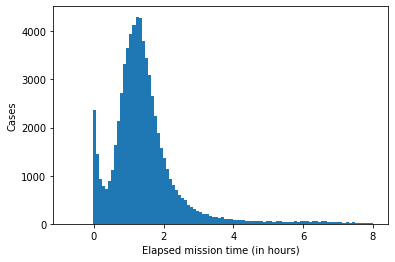

In [392]:
import matplotlib.pyplot as plt
h_deltas = deltas.astype('timedelta64[h]')
h_deltas = deltas / pd.Timedelta(hours=1)
h_deltas
#(h_deltas / pd.Timedelta(minutes=1)).hist(bins=xrange(50, 120, 1))
#
# TODO TODO TODO: remove these outliers in the future!
plt.hist(h_deltas[h_deltas < 8].to_list(), bins=100);
plt.xlabel("Elapsed mission time (in hours)");
plt.ylabel("Cases");
h_deltas = h_deltas[h_deltas < 8]

In [429]:
# This contains mapping ID -> mission time (in hours)
h_deltas


very_good_ids = h_deltas.index

h_deltas.fillna(0., inplace=True)  # just 1 row, ok
#h_deltas['3681282585'] = 0.
#print(h_deltas[~h_deltas.isna()])

print(h_deltas.max(), h_deltas.min())

h_deltas = (h_deltas - h_deltas.mean()) / (h_deltas.max() - h_deltas.min())
h_deltas += 0.24
h_deltas[h_deltas < 0.] = 0.
print(h_deltas.min(), h_deltas.max())
print(h_deltas.mean())

#print(sum(h_deltas) / len(h_deltas))

#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(h_deltas.values.reshape(-1, 1))
#print(sum(x_scaled) / len(x_scaled))



# def corr2hex(n):
#     ''' Maps a number in [0, 1] to a hex string '''
#     #if n == np.nan: return '#000000'
#     if n == 1.: return '#ffffff'
#     if not (n >= 0. and n <= 1.):
#         return '#000000'
#     else: return '#' + hex(int(n * 16**6))[2:].zfill(6)

# colors = [corr2hex(x__) for x__ in x_scaled]
# #print(colors)

# colors_ = [1 if i > 2 else 0 for i in x_scaled]

0.9908008283274226 0.0
0.0 0.9977715653523518
0.24000003238627263


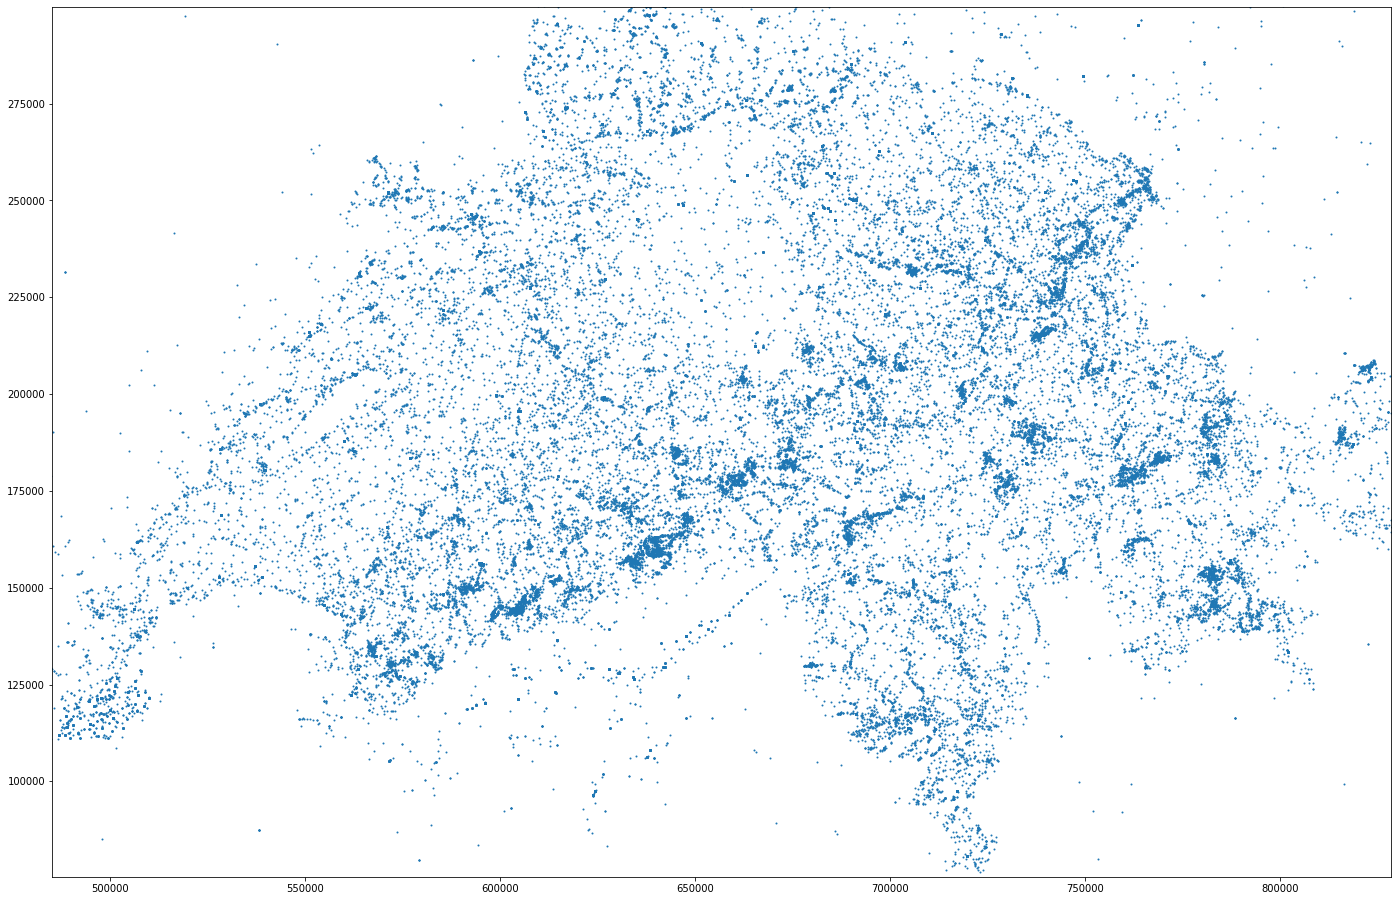

In [434]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
my_cmap = ListedColormap(colors, name='my_colormap_name')

good_places = place_action[place_action['ID'].isin(very_good_ids)]
p = good_places[['X','Y','ID']]

colors = [[h_deltas[id_], 0, 0] for id_ in good_places['ID']]
sizes = [math.sqrt(h_deltas[id_]) * 10 for id_ in good_places['ID']]

plt.figure(figsize = (24,16))
plt.scatter(p['X'], p['Y'],s=1)
plt.xlim(485071.54, 828515.78)
plt.ylim(75346.36, 299941.84)
plt.show()

In [ ]:
# X_delta, Y_delta -> total_time
# From this, obtain the residuals and see regions where the error is high

### States
Dauerauftrag -> Vorgeplant -> Vergabe
|||

Aufnahme -> Vergabe -> Storniert

Aufnahme -> Storniert

Aufnahme -> Vergabe -> Reserviert -> Alarmiert -> Vergabe -> Reserviert -> Vergabe -> Reserviert -> Vergabe -> Reserviert -> Alarmiert -> Beendet

In [102]:
# 04_PLACE_OF_ACTION: looks like data from emergency calls for t1
# Either we have coords or the address

# POS: always 1, except for one row
# POS_RESOURCE: always empty
# COUNTRY: country code, mostly CH,DE,FR,IT
# REGION: don't forget to lowercase
# CITY, CITY_DISTRICT, ...: same
# INFO_LOCATION: free-text data about exact location - -Norden Plateau, 400m summit
# ADDROBJNAME: name of the object (RegaCenter, Journal, hill, ...)
# IDADDROBJ: self explanatory
# REMARK: free-text type of event (Notfall, NF, IPS, Schockraum, ...)
# DATETYPE: immediate (MOST), fixed_date, interval, from, till
# Z: always null
# X, Y: 20K nulls, 180K not null, not sure why null, drop

place_action = pd.read_csv(os.path.join(base_dir, "04_PLACE_OF_ACTION.csv"))
print(place_action.columns)

Index(['ID', 'IDEVENTPOS', 'POS', 'POS_RESOURCE', 'COUNTRY', 'REGION', 'CITY',
       'CITY_DISTRICT', 'ZIPCODE', 'STREET1', 'STREET2', 'HOUSENUMBER',
       'INFO_LOCATION', 'ADDROBJNAME', 'X', 'COORD', 'IDADDROBJ', 'NAME',
       'FIRSTNAME', 'TELNUMBER', 'REMARK', 'JOB', 'USE', 'DATETYPE',
       'FROM_DATE', 'TILL_DATE', 'DISPOUNIT', 'JOBTIME', 'TITLE', 'SIGNAL',
       'Y', 'WAITTIMEUNITS', 'Z'],
      dtype='object')


/opt/envs/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
# 05_DESTINATION: looks like names of hospitals for t2
destination = pd.read_csv(os.path.join(base_dir, "05_DESTINATION.csv"))
destination.columns

/opt/envs/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ID', 'IDEVENTPOS', 'POS', 'POS_RESOURCE', 'COUNTRY', 'REGION', 'CITY',
       'CITY_DISTRICT', 'ZIPCODE', 'STREET1', 'STREET2', 'HOUSENUMBER',
       'INFO_LOCATION', 'ADDROBJNAME', 'X', 'COORD', 'IDADDROBJ', 'NAME',
       'FIRSTNAME', 'TELNUMBER', 'REMARK', 'JOB', 'USE', 'DATETYPE',
       'FROM_DATE', 'TILL_DATE', 'DISPOUNIT', 'JOBTIME', 'TITLE', 'SIGNAL',
       'Y', 'WAITTIMEUNITS', 'Z'],
      dtype='object')

In [104]:
# 06_RESOURCES: list of all flying units, but there are 10K for some reason
# X: N/A only in 1000 rows

resources = pd.read_csv(os.path.join(base_dir, "06_RESOURCES.csv"))
resources.columns
resources[~resources['X'].isna()]

/opt/envs/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID  IDRESOURCE                   TYPE        CALL_SIGN  \
0       3014317246  3014311699  Rega_Heli_bis_09NOV15            HBZRA   
1       3014317246  3014311712  Rega_Heli_bis_09NOV15            HBZRB   
2       3014317246  3014311716  Rega_Heli_bis_09NOV15            HBZRD   
3       3014317246  3014311720  Rega_Heli_bis_09NOV15            HBZRF   
4       3014317246  3014311720  Rega_Heli_bis_09NOV15            HBZRF   
...            ...         ...                    ...              ...   
105003  3726118676  3207944689                  EC145           Rega 4   
105004  3726121226  3207944891                  AW109           Rega 8   
105005  3726121395  3207944891                  AW109           Rega 8   
105006  3726132773  3389122668            Heli_Umland  CH11, Villingen   
105007  3726166381  3389122668            Heli_Umland  CH11, Villingen   

               DESCRIPTION COUNTRY             REGION                    CITY  \
0        alte Rolle EC 145      CH             ZURICH                  KLOTEN   
1        alte Rolle EC 145      CH             ZURICH                  KLOTEN   
2        alte Rolle EC 145      CH             ZURICH                  KLOTEN   
3        alte Rolle EC 145      CH             ZURICH                  KLOTEN   
4        alte Rolle EC 145      CH             ZURICH                  KLOTEN   
...                    ...     ...                ...                     ...   
105003               HBZQJ      CH               VAUD                LAUSANNE   
105004               HBZRS      CH                URI                ERSTFELD   
105005               HBZRS      CH                URI                ERSTFELD   
105006  CH11, Christoph 11      DE  BADEN-WURTTEMBERG  VILLINGEN-SCHWENNINGEN   
105007  CH11, Christoph 11      DE  BADEN-WURTTEMBERG  VILLINGEN-SCHWENNINGEN   

           CITY_DISTRICT  ZIPCODE  ... TO_Z IDADDROBJHOME  \
0       ZURICH-FLUGHAFEN   8302.0  ...  NaN -3.015107e+09   
1       ZURICH-FLUGHAFEN   8302.0  ...  NaN -3.015107e+09   
2       ZURICH-FLUGHAFEN   8302.0  ...  NaN -3.015107e+09   
3       ZURICH-FLUGHAFEN   8302.0  ...  NaN -3.015107e+09   
4       ZURICH-FLUGHAFEN   8302.0  ...  NaN -3.015107e+09   
...                  ...      ...  ...  ...           ...   
105003   Rega Basis EBLS   1018.0  ...  NaN  3.014209e+09   
105004   Rega Basis EBUR   6472.0  ...  NaN  3.014209e+09   
105005   Rega Basis EBUR   6472.0  ...  NaN  3.014209e+09   
105006    Helibasis CH11      NaN  ...  NaN  3.014209e+09   
105007    Helibasis CH11      NaN  ...  NaN  3.014209e+09   

                    AVLTIME LAST_CHANGE_SHORTNAME          LAST_CHANGE  \
0       2015-11-10 02:59:38               bearega  2015-11-12 16:18:37   
1       2015-11-09 20:21:02               bearega  2015-11-12 16:19:26   
2       2015-11-10 02:48:50               bearega  2015-11-12 16:21:34   
3       2015-11-10 03:19:18               bearega  2015-11-12 16:22:57   
4       2015-11-10 03:19:18               bearega  2015-11-12 16:22:57   
...                     ...                   ...                  ...   
105003  2019-07-02 22:13:07               skarega  2019-06-27 22:51:34   
105004  2019-07-02 21:57:51               frdrega  2019-06-23 13:16:43   
105005  2019-07-02 21:57:51               frdrega  2019-06-23 13:16:43   
105006  2019-07-03 00:53:48               bearega  2018-06-07 16:25:57   
105007  2019-07-03 00:53:48               bearega  2018-06-07 16:25:57   

        SAPWERK  REGA_REMARK IS_CHECKED AVL_DURATION  \
0          EBBS          NaN          0        07:59   
1          EBTU          NaN          0          NaN   
2          EBZH          NaN          0        02:20   
3          EBBE          NaN          0        00:10   
4          EBBE          NaN          0        00:10   
...         ...          ...        ...          ...   
105003     EBLS          NaN          0      6898:25   
105004     EBUR          NaN          0      6898:40   
105005     EBUR          NaN

In [15]:
helis = resources['CALL_SIGN'].value_counts()
helis[helis > 1000]

Rega 2                   5062
Rega 3                   4486
Rega 7                   4177
Rega 1                   4138
CH11, Villingen          4010
Rega 10                  3991
Rega 4                   3602
Rega 5                   3449
CH54, Freiburg           3182
Rega 8                   3023
Rega 6                   3001
HBZRA                    2967
Rega 9                   2696
HBZRD                    2516
HBZRF                    2470
HBZRB                    2368
AGL08                    2198
HBZRX                    2176
CH45, Friedrichshafen    2157
Rega 12                  2147
HBZRC                    2067
HBZRW                    2065
HBZRT                    2065
Rega 14                  1958
HBZRE                    1807
HBZRU                    1706
HBZRS                    1652
HBZRQ                    1545
HBZRZ                    1536
HBZRR                    1533
Lions 1                  1518
HBZRY                    1489
Rega 15                  1480
HBZRV     

In [16]:
spitals = pd.read_csv("data/Spitalliste_ICAD.csv")
spitals.head()

object objectId      zip  \
0  ACURA Kliniken (Landung Fussballplatz), Gemark...   S10144  72458.0   
1  Ameos Klinikum Kaiserstuhl, Bischoffingen, Vog...   S10119  79235.0   
2                                Andreasklinik, Cham    S7171   6330.0   
3                             Asana Spital, Menziken    S8454   5737.0   
4           Asklepios Klinik, Lindau (Bodensee) (DE)   S10108  88131.0   

                       city                     street streetnr country  \
0                  Albstadt           Friedrichstrasse       39      DE   
1  Vogtsburg Im Kaiserstuhl                 Brunngasse        1      DE   
2                      Cham                Rigistrasse        1      CH   
3                  Menziken                 Spitalstr.        1      CH   
4         Lindau (Bodensee)  Friedrichshafener Strasse       82      DE   

                     email             OriginID   latitude  longitude  maxNACA  
0                      NaN  5196432838260706633  48.227053   9.026401        4  
1                      NaN  2001253531770124787  48.104452   7.631389        4  
2   info@andreasklinik.ch   2425700371581379678  47.181817   8.455164        4  
3  info@spitalmenziken.ch   7588054419050351226  47.245695   8.189878        4  
4                      NaN  3981172994850218233  47.563460   9.683616        4

**Want (most essential data):**
- helicopter type
- location at t0
- location at t1
- t1 - t0

In [ ]:
# Join 01, 02, 04 and 06 on ID
# From 01: STARTTIME FINISHTIME CALLTIME
# From 02: TIME_ALARM RESOURCETYPE_AT_ALARMTIME
# From 04 and 06: X, Y
# Where is the t1 time???

In [146]:
data.columns
#data['STATUS'].value_counts()
df = data[data['STATUS'] == 'finished']  # about 150k rows
df = df[['ID', 'CALLTIME', 'STARTTIME', 'FINISHTIME']]

#event_res.columns
#event_res[['ID', 'TIME_ALARM']] # 'RESOURCETYPE_AT_ALARMTIME'

df = df.join(event_res[['ID', 'TIME_ALARM']].set_index("ID"), on='ID', how='inner')
#df = df.join(place_action, on='ID', how='inner')
#df = df.join(resources, on='ID', how='inner')
df['CALLTIME'] = pd.to_datetime(df['CALLTIME'])
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])
df.head()
df['CALLTIME'] - df['STARTTIME']

0        -1 days +23:59:43
0        -1 days +23:59:43
0        -1 days +23:59:43
0        -1 days +23:59:43
55                00:00:00
                ...       
206328            00:00:00
206328            00:00:00
206329            00:00:00
206331            00:00:00
206337            00:00:00
Length: 112510, dtype: timedelta64[ns]

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(mean_absolute_error(y_train, y_pred))